# Tag Distribution Breakdown

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
pd.options.display.max_columns = None

### HRCS Research Activity Codes
#### Top level RAC codes

In [4]:
ra_df = pd.read_parquet("../data/clean/clean.parquet")
ra_df["count"] = 1
ra_df.head(10)

,FundingOrganisation,OrganisationReference,AwardTitle,AwardAbstract,RA,RA_top,HC,index,AllText,count
0,Action Medical Research,1942,Over two years to investigate sleep and memory...,Epilepsy in early childhood is associated with...,[2.1],[2],[neurological],0,Over two years to investigate sleep and memory...,1
1,Medical Research Council,MC_UU_12010/7,Innate pathways in inflammatory and infectious...,Goals To define mechanisms of innate immune se...,[2.1],[2],"[infection, inflammatory and immune system]",1,Innate pathways in inflammatory and infectious...,1
2,Medical Research Council,MC_UU_12010/8,Activation of innate nucleic acid sensing path...,The innate immune response is critical for suc...,[2.1],[2],"[infection, inflammatory and immune system]",2,Activation of innate nucleic acid sensing path...,1
3,Medical Research Council,MC_UU_12010/9,Single-molecule super-resolution microscopy of...,Single-molecule super-resolution microscopy of...,[1.1],[1],[inflammatory and immune system],3,Single-molecule super-resolution microscopy of...,1
4,Medical Research Council,MC_UU_12014/2,Basis of the host range and tissue tropism for...,Hepatitis C virus (HCV) is a major cause of ch...,[2.1],[2],[infection],4,Basis of the host range and tissue tropism for...,1
5,Medical Research Council,MC_UU_12010/6,Identification of pathways involved in immune ...,Goals To understand how the immune system regu...,[1.1],[1],[inflammatory and immune system],5,Identification of pathways involved in immune ...,1
6,Medical Research Council,MC_UU_12014/4,Regulation of the initial stages of herpes sim...,There are several herpesviruses that infect a ...,[2.2],[2],[infection],6,Regulation of the initial stages of herpes sim...,1
7,Medical Research Council,MC_UU_12010/5,Pathogenesis and treatment of cutaneous atopic...,Atopic disease affects 20-30% of the UK popula...,[2.1],[2],[inflammatory and immune system],7,Pathogenesis and treatment of cutaneous atopic...,1
8,Medical Research Council,MC_UU_12010/3,Multiple sclerosis and the Major Histocompatib...,Goals To provide a functional understanding of...,[2.1],[2],[neurological],8,Multiple sclerosis and the Major Histocompatib...,1
9,Medical Research Council,MC_UP_A600_1110,Physiological role of G-protein coupled recept...,The G-protein coupled receptors (GPCRs) repres...,[5.2],[5],[generic health relevance],9,Physiological role of G-protein coupled recept...,1


In [5]:
def plot_label_distribution(df, col):
    ra_df_exploded = df.explode(col)
    ra_counts = ra_df_exploded[[col, "count"]].copy()
    ra_counts = ra_counts.groupby(col, as_index=False).sum()
    # sort by count
    ra_counts = ra_counts.sort_values("count", ascending=True)
    ra_counts.plot(kind="barh", y="count", x=col, figsize=(10, 10))
    plt.title(f"{col} distribution")

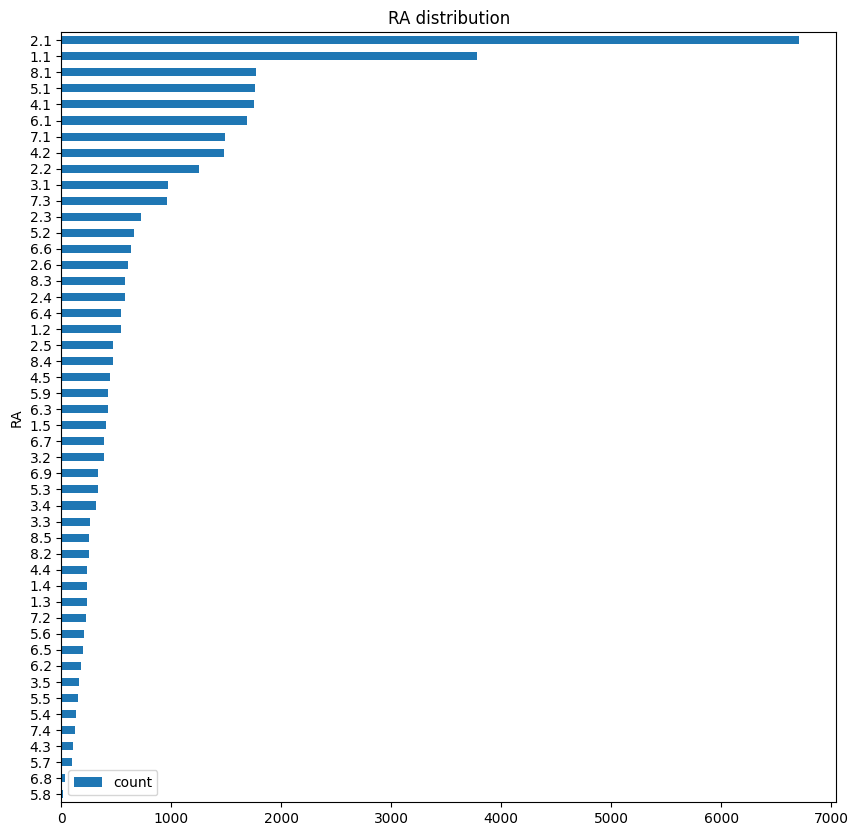

In [6]:
plot_label_distribution(ra_df, "RA")

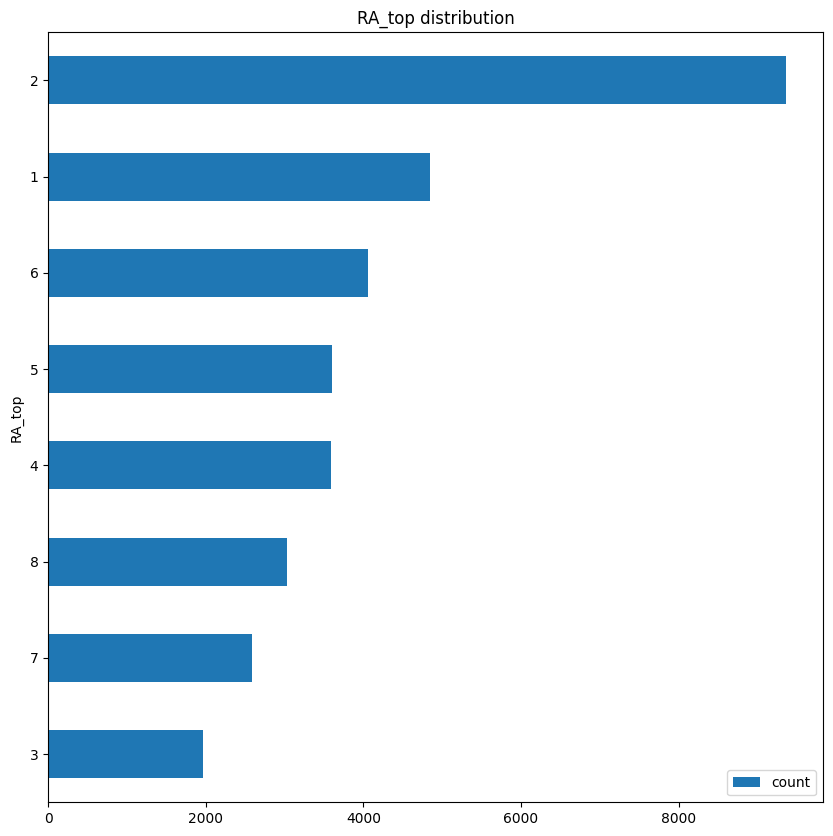

In [7]:
plot_label_distribution(ra_df, "RA_top")

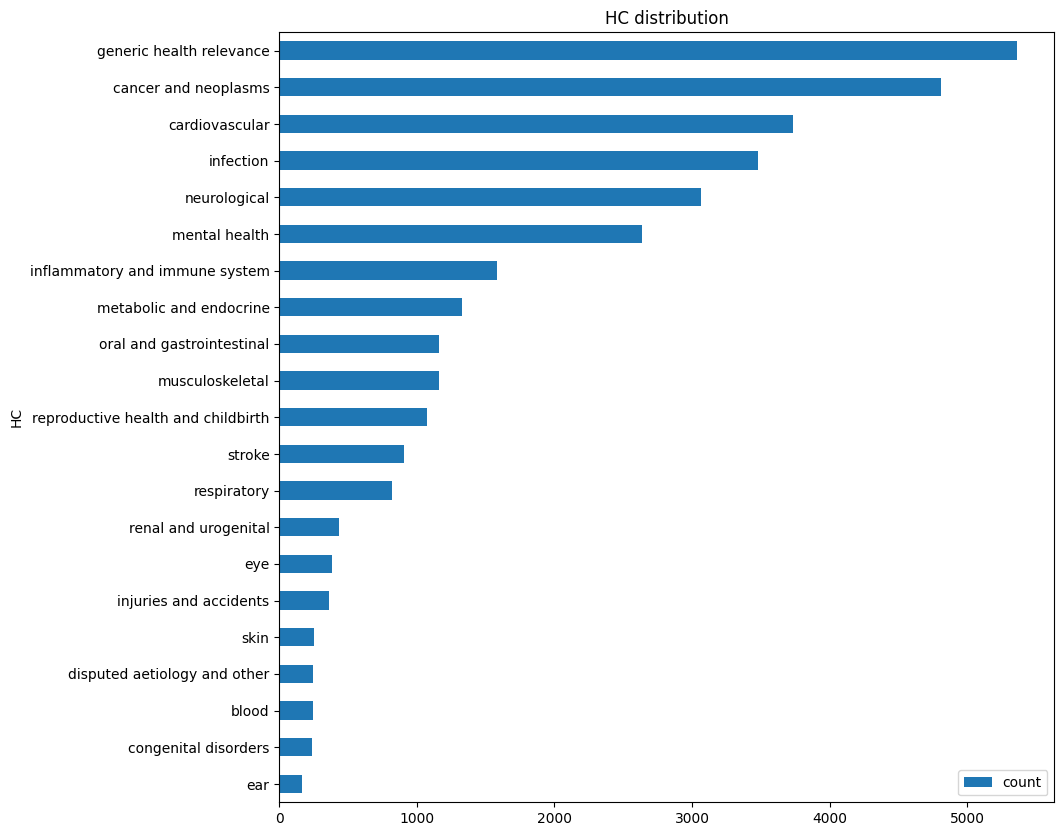

In [8]:
plot_label_distribution(ra_df, "HC")

In [9]:
downsampled_df = ra_df.loc[ra_df["RA"].astype(str) != "['2.1']"]
downsampled_df = pd.concat(
    [
        downsampled_df,
        ra_df.loc[ra_df["RA"].astype(str) == "['2.1']"].sample(1000, random_state=2),
    ]
)

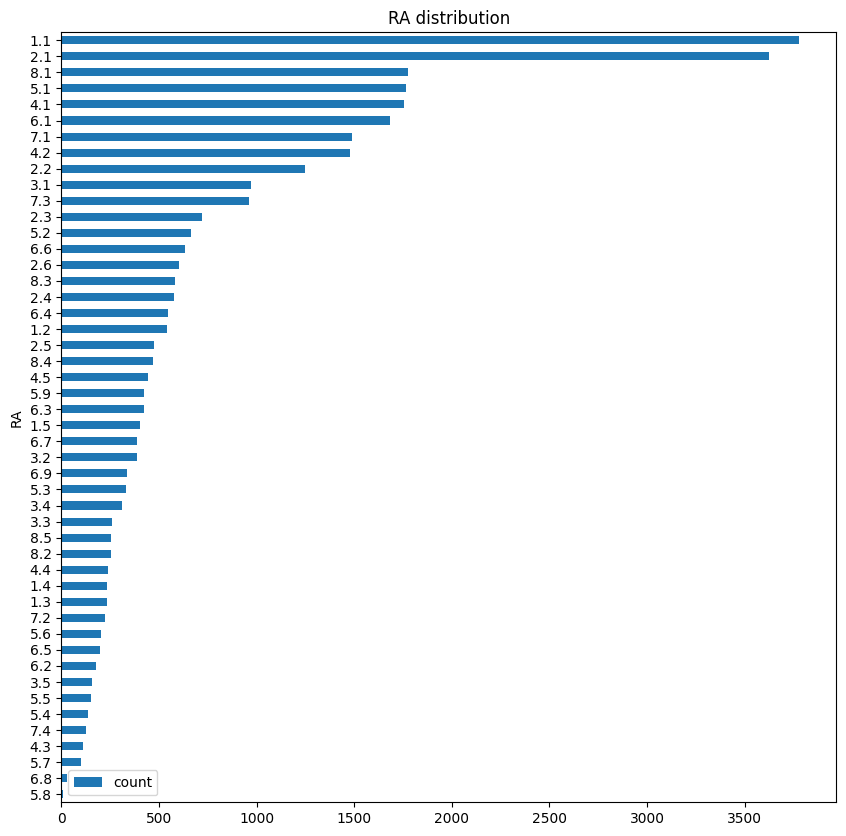

In [10]:
plot_label_distribution(downsampled_df, "RA")

In [11]:
ra_df = pd.read_parquet("../data/clean/clean.parquet")
downsampled_df.to_parquet("../data/clean/clean.parquet", index=False)